# CS4661 Project Report: Music Genre Classification

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# "read_csv" is a pandas function that we use here to read the data file "train (1).csv"
train_df = pd.read_csv("shai-music-genre-classification//train (1).csv")

# Create a variable for the mean of values in the "instrumentalness" column
X_mean_instrum = train_df['instrumentalness'].mean()

# Create a variable for the mean of values in the "Popularity" column
X_mean_popul = train_df['Popularity'].mean()

# Create a variable for the mean of values in the "key" column
X_mean_key = train_df['key'].mean()

# Replace NaNs in these columns with the mean of values for their respective columns
train_df['instrumentalness'].fillna(value=X_mean_instrum, inplace=True)
train_df['Popularity'].fillna(value=X_mean_popul, inplace=True)
train_df['key'].fillna(value=X_mean_key, inplace=True)

In [3]:
# Since label value 10 corresponds to 'rock', we will replaces all 10 values with 1 and all others with 0 in the 'Class' 
# column so that we can have a binary classification
not_rock = train_df['Class'] != 10
is_rock = train_df['Class'] == 10

train_df.loc[not_rock, 'Class'] = 0
train_df.loc[is_rock, 'Class'] = 1

# Testing Accuracy and AUC when NaN values are replaced with the mean of all other values in that column

In [4]:
# Create a python list of feature names
feature_cols = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness',
                'instrumentalness','liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

# Use the above feature name list to select the features from the DataFrame
X = train_df[feature_cols]

# Select a series of labels (the last column) from the DataFrame
y = train_df['Class']

# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.15" means that we pick 15% of data samples for testing set, and the rest (85%) for training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)

print(X_train.shape)
X_train

(12236, 14)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
9188,49.0,0.184,0.207,2.0,-17.119,1,0.0330,0.940000,0.931000,0.0772,0.089,79.979,251173.000000,3
7086,69.0,0.553,0.872,1.0,-2.832,0,0.0782,0.198000,0.178129,0.0659,0.638,172.138,3.676217,4
3463,22.0,0.118,0.964,1.0,-4.060,1,0.4360,0.000120,0.139000,0.3370,0.107,200.003,269787.000000,4
1897,58.0,0.634,0.648,3.0,-6.781,0,0.0412,0.361000,0.178129,0.6190,0.667,95.989,4.130200,4
1907,32.0,0.413,0.690,10.0,-6.868,1,0.0299,0.212000,0.024100,0.3140,0.483,95.260,267533.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,37.0,0.479,0.909,2.0,-7.404,1,0.0716,0.000091,0.758000,0.6340,0.278,111.892,310467.000000,4
9859,71.0,0.671,0.256,7.0,-10.743,1,0.0387,0.608000,0.178129,0.0737,0.694,115.871,233560.000000,4
11513,39.0,0.579,0.636,2.0,-8.574,0,0.0276,0.082100,0.922000,0.4460,0.898,132.652,280853.000000,4
1688,66.0,0.478,0.974,7.0,-3.866,1,0.1020,0.000266,0.098400,0.0738,0.268,141.077,248307.000000,4


## Random Forest Implementation

In [5]:
my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=6)

# Training ONLY on the training set:
my_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict = my_RandomForest.predict(X_test)

In [6]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparison and returns the 
# portion of correct predictions:

score = accuracy_score(y_test, y_predict)

print("The accuracy score of the Random Forest is: " + str(score))

The accuracy score of the Random Forest is: 0.7060185185185185


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [7]:
# Estimating the probability (likelihood) of each label:
y_predict_prob = my_RandomForest.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

### AUC:

In [8]:
AUC = metrics.auc(fpr, tpr)
print("The AUC of the Random Forest is: " + str(AUC))

The AUC of the Random Forest is: 0.6946996742671012


### ROC Curve:

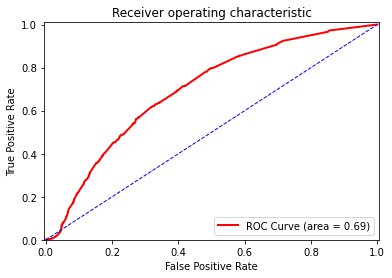

In [9]:
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Decision Tree Implementation

The accuracy score of the Decision Tree is: 0.649074074074074
The AUC of the Decision Tree is: 0.5592052117263844


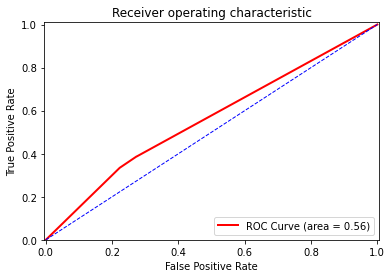

In [10]:
my_dt = DecisionTreeClassifier(random_state=3)

#Training the model
my_dt.fit(X_train, y_train)

#Making predictions with test set
y_predict_dt = my_dt.predict(X_test)

#Calculating and displaying accuracy score of the decision tree
score = accuracy_score(y_test, y_predict_dt)
print("The accuracy score of the Decision Tree is: " + str(score))

#Calculating AUC
y_predict_prob = my_dt.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print("The AUC of the Decision Tree is: " + str(AUC))

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## KNN Implementation

The accuracy score of the knn is: 0.6944444444444444
The AUC of the KNN is: 0.5829039739413682


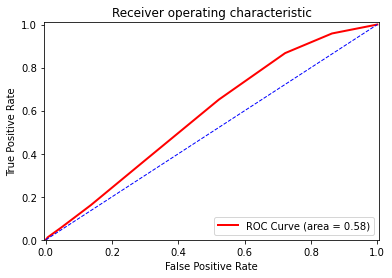

In [11]:
k = 10
my_knn = KNeighborsClassifier(n_neighbors=k)

#Training the model
my_knn.fit(X_train, y_train)

#Making predictions with test set
y_predict_knn = my_knn.predict(X_test)

#Calculating and displaying accuracy score of the decision tree
score = accuracy_score(y_test, y_predict_knn)
print("The accuracy score of the knn is: " + str(score))

#Calculating AUC
y_predict_prob = my_knn.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print("The AUC of the KNN is: " + str(AUC))

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Testing accuracy and AUC if features with possible NaN values are just ignored

In [12]:
feature_cols2 = ['danceability','energy','loudness','mode','speechiness','acousticness','liveness',
                 'valence','tempo','duration_in min/ms', 'time_signature']

X = train_df[feature_cols2]
y = train_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)

## Random Forest Implementation

The accuracy score of the Random Forest is: 0.6856481481481481
The AUC of the Random Forest is: 0.6663379804560261


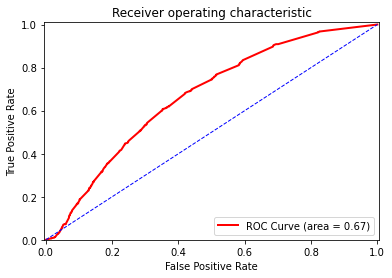

In [13]:
my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=6)

# Training ONLY on the training set:
my_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict = my_RandomForest.predict(X_test)

#Calculating and displaying accuracy score of the random forest
score = accuracy_score(y_test, y_predict)

print("The accuracy score of the Random Forest is: " + str(score))

#Calculating AUC
y_predict_prob = my_RandomForest.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print("The AUC of the Random Forest is: " + str(AUC))

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Decision Tree Implementation

The accuracy score of the Decision Tree is: 0.6638888888888889
The AUC of the Decision Tree is: 0.5739309446254072


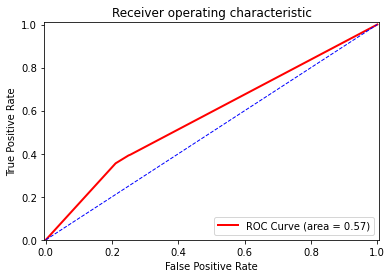

In [14]:
my_dt = DecisionTreeClassifier(random_state=3)

#Training the model
my_dt.fit(X_train, y_train)

#Making predictions with test set
y_predict_dt = my_dt.predict(X_test)

#Calculating and displaying accuracy score of the decision tree
score = accuracy_score(y_test, y_predict_dt)
print("The accuracy score of the Decision Tree is: " + str(score))

#Calculating AUC
y_predict_prob = my_dt.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print("The AUC of the Decision Tree is: " + str(AUC))

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## KNN Implementation

The accuracy score of KNN is: 0.6916666666666667
The AUC of the KNN is: 0.575383973941368


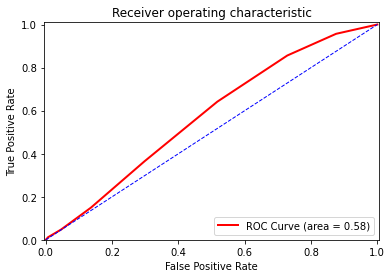

In [15]:
k = 10
my_knn = KNeighborsClassifier(n_neighbors=k)

#Training the model
my_knn.fit(X_train, y_train)

#Making predictions with test set
y_predict_knn = my_knn.predict(X_test)

#Calculating and displaying accuracy score of knn classifier
score = accuracy_score(y_test, y_predict_knn)
print("The accuracy score of KNN is: " + str(score))

#Calculating AUC
y_predict_prob = my_knn.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print("The AUC of the KNN is: " + str(AUC))

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()